# Statistical Arbitrage with Time Series Analysis

## Learning and Cointegration in Pairs

This report have describe the implementation and techniques used for implementing Statistical Arbitrage / Cointegration in Pairs. To keep it simple project is limited to a pair rather than portfolio of stocks.

• Part 1 - Describe details about the data used for this project

• Part 2 - Describe concise matrix form estimation for multivariate Vector Auto regression and conduct model spectification test for:      
      
      (a) Identification of optimal lag p with AIC / BIC tests 
      
      (b) Stability check with eigenvectors of the autoregression system.

• Part 3 - Describes implementation of Engle-Granger procedure and explore several cointegrated pairs.

• Part 4 - Describes robust estimation.

• Part 5 - Trading strategy based on cointegration spread.


# Part 1 - Data sets used in this project

### Simulated Data

Simulated Stochastic processes produced using Monte Carlo (MC) where random samples are drawn using normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


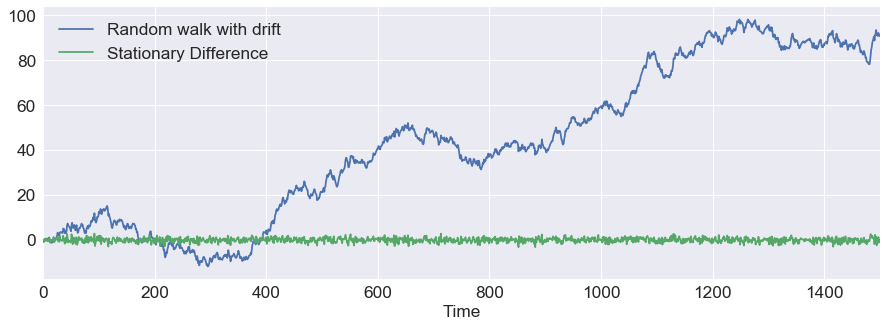

In [1]:
import pandas as pd
# Import statsmodels equivalents to validate results
from statsmodels.tsa.api import VAR
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.tsatools import (lagmat, add_trend)
from statsmodels.tsa.stattools import adfuller
import numpy as np
import math
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Monte Carlo
np.random.seed(1000)  
M = 1500  
Y_t = np.zeros((M + 1))
Y_t[0] = 0.0
a = 0.07

for i in range(1, M + 1):
    Y_t[i] = Y_t[i-1] + np.random.normal(0, 1) + a 

Y_t = pd.Series(Y_t, name='Y_t')
_ = Y_t.plot()
_ = Y_t.diff().plot()

_ = plt.xlabel('Time')
_ = plt.legend(['Random walk with drift', 'Stationary Difference'], loc='upper left')



### Market Data

* To keep it simple two stocks historic prices are used to describe the project. 

* The pairs researched for cointegration are US banking stocks Bank of America and Citi bank.

* The two series of adjusted closing prices were joined to produce a single dataset consisting of daily adjusted closing prices for Bank of America and Citi bank.

* The time series is for Jan-2014 to Dec-2015 for the in-sample testing and Jan-2016 to Jun-2016 for the out-of-sample testing. This was because several sources recommend to use one year of historic data to estimate the cointegration parameters and trade the estimates for a 6-month period, given that the parameters might change over time or the relationship cease to exist

* Since Time series of stocks are generally non stationary. A log of returns was taken to make the Time Series stationary.


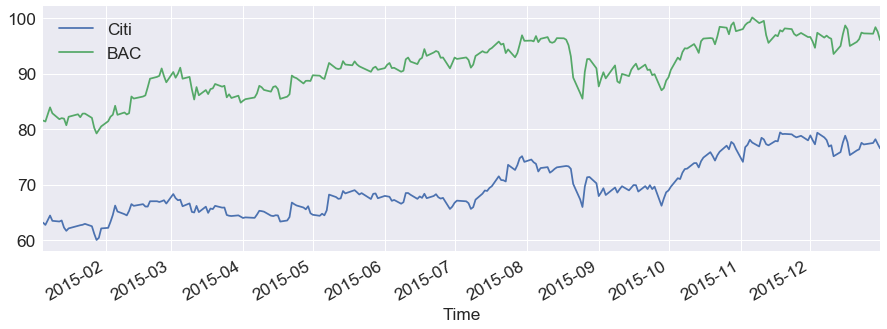

In [2]:
from matplotlib import gridspec

instrument1 = pd.read_csv("MarketData/C.csv", index_col=0, parse_dates=True, dayfirst=True)
instrument1['Returns'] = np.log(instrument1['Adj Close'].astype(np.float)/instrument1['Adj Close'].shift(1).astype(np.float))

instrument1 = instrument1[datetime(2015, 1, 1):datetime(2016, 12, 31)]

instrument1_is = instrument1[datetime(2015, 1, 1):datetime(2015, 12, 31)]  
instrument1_os = instrument1[datetime(2016, 1, 1):datetime(2016, 12, 31)]

instrument1 = instrument1_is[1:]

instrument2 = pd.read_csv("MarketData/BAC.csv", index_col=0, parse_dates=True, dayfirst=True)
instrument2['Returns'] = np.log(instrument2['Adj Close'].astype(np.float)/instrument2['Adj Close'].shift(1).astype(np.float))

instrument2 = instrument2[datetime(2015, 1, 1):datetime(2016, 12, 31)]

instrument2_is = instrument2[datetime(2015, 1, 1):datetime(2015, 12, 31)]  
instrument2_os = instrument2[datetime(2016, 1, 1):datetime(2016, 12, 31)]

instrument2 = instrument2_is[1:]

returns1 = instrument1['Returns'].values
returns2 = instrument2['Returns'].values

Y1_t = instrument1['Adj Close']
Y2_t = instrument2['Adj Close']

Y1_t_Series = pd.Series(Y1_t, name='Citi')
Y2_t_Series = pd.Series(Y2_t, name='BAC')


returns1_os = instrument1_os['Returns'].values
returns2_os = instrument2_os['Returns'].values

Y1_t_os = instrument1_os['Adj Close']
Y2_t_os = instrument2_os['Adj Close']

Y1_t_os_Series = pd.Series(Y1_t_os, name='Citi')
Y2_t_os_Series = pd.Series(Y2_t_os, name='BAC')

_ = Y1_t_Series.plot()
_ = Y2_t_Series.plot()

_ = plt.xlabel('Time')
_ = plt.legend(['Citi', 'BAC'], loc='upper left')

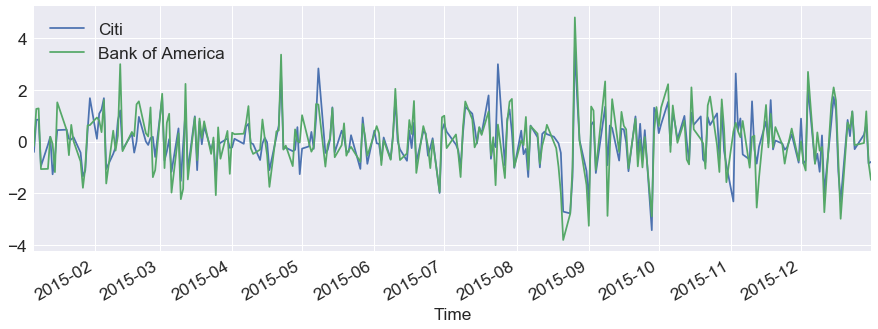

In [3]:
dY1_t = pd.Series(Y1_t, name='dY1_t').diff().dropna()
dY2_t = pd.Series(Y2_t, name='dY2_t').diff().dropna()

_ = dY1_t.plot()
_ = dY2_t.plot()

_ = plt.xlabel('Time')
_ = plt.legend(['Citi', 'Bank of America'], loc='upper left')

# Part 2 - Describe concise matrix form estimation for multivariate Vector Auto regression and conduct model spectification test  for (a) Identification of optimal lag p with AIC / BIC tests (b)  Stability check with eigenvectors of the autoregression system.

In [4]:
print("Started loading all self implementation of VAR, OLS, Optimum Lag selection based on Matrices manupulation")
%run Cointegration.py
print("Completed loading all self implementation of VAR, OLS, Optimum Lag selection based on Matrices manupulation")

Started loading all self implementation of VAR, OLS, Optimum Lag selection based on Matrices manupulation
Completed loading all self implementation of VAR, OLS, Optimum Lag selection based on Matrices manupulation


Please refer Cointegration.py for checking the self implementation of below :
    
    1. OLS
    
    2. ADFuller test
    
    3. Vector Autoregression
    
    4. Optimum Lag selection
    
    5. Stability checks
    
    6. Z - Score calucaltion
    
Please note above self implementation has been verified with Python's implementation in statsmodel library.

### Vector Autoregression (VAR)

It is a multivariate regression with past values.

VAR(p) is the simplest way of structural equation modelling.

It models a system of endogeneous variables that depends only on their past (lagged) values.

$$
Y_t = C + A_1 Y_{t-1} + ... + A_{t-p} Y_{t-p} + \epsilon_t
$$

where $ Y_t = (y_{1,t} , ... , y_{n,t})' $  is a column vector N_var X1

and A_p is a n X n matrix of coefficients for lagged variables  $ Y_{t-1} ... Y_{t-p} $

### Vector Autoregression : Estimation

Although VAR(p) can be exceedingly large, it is a system of seemingly unrelated regressions that can be estimated separately line by line using Ordinary Least Squares (OLS)

Matrix manipulation is available numpy package in Python, allowing to specify a concise form and estimate all lines of Vector Autoregression in one go.

Even though VAR implementation is available in statsmodel package in Python, Matrix based estimation of VAR was implemented using Numpy package to rewrite calculation of VAR using following steps:

* Dependent data matrix was formed as follows, with $T = N_obs$ Dependent data matrix was formed with observation for the first p lags removed. Here observation are in rows from time p+1 to most recent observation at T
$$
Y = [y_{p+1}   y_{p+2}   ...   y_{T}]
$$
where
$ [y_{1,t=1}   y_{1,...}   ...   y_{1,p}   y_{1,p+2} ...   y_{1,t=T}]$ refers to all historic observations of the variable $y_1$



* Explanatory data matrix e.g.:
\begin{equation*}
\mathbf{Z} = \begin{vmatrix}
\mathbf{1} & \mathbf{1} & ... & \mathbf{1} \\
y_{p} & y_{p+1} & ... & y_{T-1} \\
... & ... & ... & ... \\
y_{p-1} & y_{p} & ... & y_{T-2}
\end{vmatrix}
\end{equation*}


### Residual (or Disturbance) 

* Distribution matrix (innovations, residuals)

$$
\epsilon = \begin{vmatrix}
\epsilon_{p+1} & \epsilon_{p+2} & ... & \epsilon_{T}
\end{vmatrix} = \begin{vmatrix}
e_{1,p+1} & e_{1,p+2} & ... & e_{1,T} \\
e_{2,p+1} & e_{2,p+2} & ... & e_{2,T} \\
... & ... & ... & ... \\
e_{n,p+1} & e_{n,p+2} & ... & e_{n,T} \\
\end{vmatrix}
$$

Each row of residuals is for the observations of variables $y_1, y_2, y_3,..., y_{n=Nvar}$ respectively. The most recent observation is at T.


* Coffecient matrix includes the intercept C:
$$
B = \begin{vmatrix}
C & A_1 & A_2 & ... & A_p
\end{vmatrix}
$$


In [5]:

data = pd.concat([instrument1['Returns'], instrument2['Returns']], axis=1, keys=['Returns1', 'Returns2']) 

Yt = np.vstack((Y1_t, Y2_t))
Yr = np.vstack((returns1, returns2))
dY = np.vstack((dY1_t, dY2_t))


### Calculating VAR(p) Estimates

Given our matrix specifications, VAR(p) systems can be written as 
$$
Y = \beta Z + \epsilon
$$

* Calculate the multivariate OLS estimator for regression coefficients matrix $\beta$ as

$$
\hat{\beta} = Y Z' (ZZ')^{-1}
$$

* Backout regression residuals:
$$
\hat{\epsilon} = Y - \hat{\beta} Z = Y - \hat{Y}
$$



### Residual and Parameters Significance

* Estimator of the residual covariance matrix with $T = N_{obs}$

$$
\hat{\Sigma} = \frac{1}{T} \sum^{T}_{t=1} \hat{\epsilon_t} \hat{\epsilon_t}'
$$


* Covariance matrix of regression coefficients

$$
Cov(Vec(\hat{\beta})) = (ZZ')^{-1} ⊗ \hat{\Sigma} = I^{-1}
$$

where Vec denotes vectorization and ⊗ is the kronecker product. Standard errors of regression coefficients will be along the diagnol. Useful to calculate t-statistis.

### Self implementation of OLS and Vector Autoregression

from statsmodels.tsa.tsatools import (lagmat, add_trend)
import numpy as np
import pandas as pd

def GetOLS(Y,X):
    nobs = X.shape[1]
    rank = X.shape[0]
    #noofVariables = X.shape[0]
    covariance = np.linalg.inv(np.dot(X, X.T))  # [(ZZ')^-1] variance-covariance factor
    beta_hat = np.dot(np.dot(Y, X.T,), covariance) # beta_hat YZ'(ZZ')^-1
    if beta_hat.ndim < 2:
        beta_hat = beta_hat[None,:]
        
    resid_hat = Y - np.dot(beta_hat, X) # resid_hat = Y - beta_hat*Z
    df_resid = np.float(nobs - rank)
    rri = np.dot(resid_hat, resid_hat.T)  # resid_hat*resid_hat' 
    
    sigma_hat = rri / nobs #  'sigma_hat' -Estimator of the residual covariance martrix with T = Nobs
    ols_scale = rri / df_resid # OLS estimator for cov matrix
    
    cov_params = np.kron(covariance, ols_scale)  # covariance matrix of parameters
    bvar = np.diag(cov_params)  # variances - diagonal of covariance matrix
    stderr = np.sqrt(bvar)  # standard error
    stderr = stderr.reshape((beta_hat.shape[0], beta_hat.shape[1]), order='C')
    
    tvalues = beta_hat / stderr  # t-statistic for a given parameter estimate
    nobs2 = nobs / 2.0
    llf = -nobs2 * np.log(2 * np.pi) - nobs2 * np.log(sigma_hat) - nobs2  # log-likelihood function
    df_model = rank  # degrees of freedom of model
    eigenvalues = np.roots(np.r_[1,-beta_hat[0]])  # eigen values
    roots = eigenvalues ** -1  #roots
    
    is_Stable = np.all(np.abs(roots) > 1)
    resultOLS = {'X': X,
    'Y': Y,
    'beta_hat': beta_hat,
    'resid_hat': resid_hat,
    'nobs': nobs,
    'df_resid': df_resid,
    'rri': rri,
    'sigma_hat': sigma_hat,
    'ols_scale': ols_scale,
    'cov_params': cov_params,
    'stderr': stderr,
    'tvalues': tvalues,
    'llf': llf,
    'df_model': df_model,
    'roots': roots,
    'is_Stable': is_Stable
    }
    return resultOLS

def GetVectorAR(Y, maxlags=None,  trend=None):

    nobs = Y.shape[1]
    Yshort = Y[:,maxlags:]
    Z =  np.ones(nobs-maxlags)
    if maxlags == 0:
        Z = np.ones(nobs-maxlags)[None,:]
    else:
        for j in range(1,maxlags+1):
            Z = np.vstack((Z, Y[:,maxlags-j:-j]))
    if trend is not None:
        Z = add_trend(Z.T, prepend=True, trend=trend)  # prepends puts trend column at the beginning
        Z = Z.T

    resultVectorAR = GetOLS(Y=Yshort, X=Z)
    resultVectorAR['maxlags'] = maxlags
    K_dash = 2 * (2* maxlags + 1)
    AIC = np.log(np.absolute(np.linalg.det(resultVectorAR['sigma_hat']))) + 2.0 * K_dash / (resultVectorAR['nobs']) # log(sigma_hat) + 2*K_dash/T        
    BIC = np.log(np.absolute(np.linalg.det(resultVectorAR['sigma_hat']))) + (K_dash/ resultVectorAR['nobs']) * np.log(resultVectorAR['nobs']) # log(sigma_hat) + K_dash/T*log(T)
    resultVectorAR['AIC'] = AIC
    resultVectorAR['BIC'] = BIC
    
    return resultVectorAR


### Optimal Lag Selection

Optimal Lap p is determined by the lowest values of AIC, BIC statistics constructed using penalised likelihood.

* Akaike Information Creterion (AIC)

$$
AIC = log |\hat{\Sigma}| + \frac{2K'}{T}
$$

* Bayesian Information Creterion (also Schwarz Criterion) (BIC)

$$
BIC = \log |\hat{\Sigma}| + \frac{K'}{T} \log(T)
$$


where $K' = n (n * p + 1)$ is the total number of variables in VAR(p)



#### Self implementation of finding optimum lags:

def GetOptimalLag(Y,maxlags, modelType='VectorAR'):

    result={}
    for nlag in range(0, maxlags+1):
        if modelType == 'VectorAR':
            result[nlag] = GetVectorAR(Y, maxlags=nlag)
        elif modelType == 'ADFuller':
            result[nlag] = GetADFuller(Y=Y, maxlags=nlag, regression='constant')
    aicbest, bestlagaic = min((v['AIC'], k) for k, v in result.items())
    bicbest, bestlagbic = min((v['BIC'], k) for k, v in result.items())
    results = {'aicbest': aicbest,
    'bestlagaic': bestlagaic,
    'bicbest': bicbest,
    'bestlagbic': bestlagbic
    }
    return results

In [6]:
# Finding the optimum lag for Citi and BOA

maxlags = int(round(12*(len(Yr)/100.)**(1/4.)))

print("Maxlags to test %d" % maxlags) 
maxlagOptimumVectorAR = GetOptimalLag(Yr, maxlags,  modelType='VectorAR')
print(maxlagOptimumVectorAR)

Maxlags to test 5
{'aicbest': -18.33878933086277, 'bestlagaic': 0, 'bicbest': -18.310698072383634, 'bestlagbic': 0}


In [7]:
## Verified result with Python's stats model library implementation
model = VAR(Yr.T)
results = model.fit(maxlags, method='ols', ic='aic', trend='c',verbose=True)
results.summary()

                 VAR Order Selection                 
           aic          bic          fpe         hqic
-----------------------------------------------------
0      -18.34*      -18.31*   1.089e-08*      -18.32*
1       -18.31       -18.23    1.115e-08       -18.28
2       -18.30       -18.16    1.123e-08       -18.25
3       -18.31       -18.11    1.116e-08       -18.23
4       -18.33       -18.07    1.097e-08       -18.23
5       -18.30       -17.99    1.126e-08       -18.18
* Minimum

Using 0 based on aic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jul, 2017
Time:                     01:33:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.3107
Nobs:                     251.000    HQIC:                  -18.3275
Log likelihood:           1591.21    FPE:                1.08534e-08
AIC:                     -18.3388    Det(Omega_mle):     1.07674e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000677         0.000879            0.770           0.442

Results for equation y2
           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------

### Stability Condition


* It requires for the eigenvalues of each relationship matrix $A_p$ to be inside the unit circle (<1).

* This VAR system satisfies stability condition $|\lambda I - A| = 0$

* If p>1, coefficient matrix for each lag $A_p$ to be checked separately.



#### Self implementation of Stability condition:
def IsStable(roots):

    return np.all(np.abs(roots) > 1)

In [8]:
#### Stability check 
resultGetADFuller = GetADFuller(Y=dY1_t, maxlags=0, regression='c')
roots = resultGetADFuller['roots']
IsStable(roots)

False

### Augumentation DF Test for unit root

To improve the Dickey-Fuller procedure, lagged differences $\Delta y_t$ 'augment' the test, improving robustness wrt serial correlation:

$$
\Delta y_t = \phi y_{t-1} + \sum^{p}_{k=1} \phi_i \Delta y_{y-k} + \epsilon_t
$$


* Insignificant $\phi$ means unit root for series $y_t$

$$
\phi = \beta - 1 = 0 \implies \beta = 1
$$

* The critical value is taken from the empirically tabulates Dickey Fuller distribution.



#### Self implementation of ADF test:

def GetADFuller(Y, maxlags=None, regression='c'):

    #Y = np.asarray(Y)
    Y = Y.T
    dy = np.diff(Y)
    if dy.ndim == 1:
        dy = dy[:, None]
    ydall = lagmat(dy, maxlags, trim='both', original='in')
    nobs = ydall.shape[0] 
    ydall[:, 0] = Y[-nobs - 1:-1] 
    dYshort = dy[-nobs:] 
    
    if regression != 'nc':
        Z = add_trend(ydall[:, :maxlags + 1], regression) 
    else:
        Z = ydall[:, :maxlags + 1]
    
    resultADFuller = GetOLS(Y=dYshort.T, X=Z.T)  
    
    K_dash = 2 * (2*maxlags + 1)
    AIC = np.log(np.absolute(np.linalg.det(resultADFuller['sigma_hat']))) + 2.0 * K_dash / (resultADFuller['nobs']) # log(sigma_hat) + 2*K_dash/T        
    BIC = np.log(np.absolute(np.linalg.det(resultADFuller['sigma_hat']))) + (K_dash/ resultADFuller['nobs']) * np.log(resultADFuller['nobs']) # log(sigma_hat) + K_dash/T*log(T)
    resultADFuller['AIC'] = AIC
    resultADFuller['BIC'] = BIC
    resultADFuller['adfstat'] = resultADFuller['tvalues'][0,0]
    resultADFuller['maxlag'] = maxlags
    
    return resultADFuller


In [9]:
## Result from own implementation:

print("ADF stat : %f" % resultGetADFuller['adfstat'])

ADF stat : -16.393097


In [10]:
## Verify result from statsmodel implementation:
resultadfuller = adfuller(dY1_t, maxlag=0, regression='c', autolag=None, regresults=True)
print(resultadfuller)

(-16.393096999478441, 2.6823779769324956e-29, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, <statsmodels.tsa.stattools.ResultsStore object at 0x0A8AAD10>)


# Part 3 - Describes implementation of Engle-Granger procedure and explore several cointegrated pairs.

### Cointegration Analysis and Estimation

Cointegration System :
                    A linear combination $\beta_{coint}' Y_t = e_t$ must generate cointegrated residual (spread) as below $e_t$ ~ l(0)


* To obtain the spread, allocation is done in $\beta_{coint}$ as weights


* There is a cancellation of a common stochastic process in each $y_{i,t}$ : 

$$
e_t = y_{1,t} \pm \beta_2 y_r \pm ... \pm \beta_n y_{n,t}
$$

$$
\beta_{coint} = \begin{vmatrix}
1 & \pm \beta_2 & ... & \pm \beta_n  
\end{vmatrix}
$$


* Assume we have 2 time series that are co-integrated, so :

$$
Z (t;\tau_1) - \beta Z (t; \tau_2) = e_t ...... stationary I(0)
$$


* Cointegration factor $e_t$ is different from stochastic factor dX. It works with the slow speed of correction $(1-\alpha)$

$$
\Delta Z_t = \phi \Delta Z_{t-1} + (1-\alpha) [Z(\tau_1) - \beta_c Z(\tau_2) - \mu_e]_{t-1}
$$

* The level of equilibrium $E[e_{t-1}]$ = $\mu_e$ gives a risk factor a parallel shift of the yield curve.


#### Estimating Cointegration - Pairwise

* Pairwise Estimation : Select two candidate time series and applied ADF test for stationary to the joint residual. Used the estimates residual to continue with the Engle-Granger procedure.

### Engle-Granger  Procedure

#### Step 1

Obtain the fitted residual $\hat{e_t} = y_t - \hat{b} x_t - \hat{a} $ and test for unit root.

* That assumes co-integrating vetor $\beta_{coint}' = [1, \hat{-b}]$ and equilibrium level $E[\hat{e_t}] = \hat{a} = \mu_e$

* If the residual is non-stationary then no long-run relationship exists and regression is spurious.

#### Step 2

Plug the residual from Step 1 into the ECM equation and estimate parameters $\phi$, $\alpha$

$$
\Delta y_t = \phi \Delta x_t - (1- \alpha) \hat{e}_{t-1}
$$

It is required to confirm the significance for $(1 - \alpha)$ coefficient

In [11]:
# Engle-Granger self implementation:

# Engle-Granger Step 1
Y2_t_d = np.vstack((np.ones(len(Y2_t)), Y2_t))
resultGetOLS = GetOLS(Y=Y1_t.values, X=Y2_t_d)

a_hat = resultGetOLS['beta_hat'][0,0]
beta2_hat = resultGetOLS['beta_hat'][0,1]

et_hat = Y1_t - np.dot(beta2_hat, Y2_t) - a_hat

# Engle-Granger Step 2
result_et_hat_adf = GetADFuller(Y=et_hat, maxlags=1, regression ='nc')
print("ADF stat : %f" % result_et_hat_adf['adfstat'])

ADF stat : -2.217393


In [12]:
# Verify result with statsmodel implementation:

sm_result_et_hat_adf = adfuller(et_hat, maxlag=1, regression='nc', autolag=None, regresults=True)
print(sm_result_et_hat_adf)

resultols = OLS(Y1_t.T, Y2_t_d.T).fit()  # validate result with statsmodels

resultols.summary2()

(-2.2173931595112322, 0.025557570214276973, {'1%': -2.5747776155223301, '5%': -1.9421309657332253, '10%': -1.615795463888424}, <statsmodels.tsa.stattools.ResultsStore object at 0x0A8AAE90>)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.820    
Dependent Variable: Adj Close        AIC:                1086.4755
Date:               2017-07-23 01:33 BIC:                1093.5264
No. Observations:   251              Log-Likelihood:     -541.24  
Df Model:           1                F-statistic:        1141.    
Df Residuals:       249              Prob (F-statistic): 5.81e-95 
R-squared:          0.821            Scale:              4.4052   
--------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const    -13.7881     2.4713   -5.5792   0.0000   -18.6555   -8.9207
x1         0.9143     0.0271   33.7798   0.0000     0.8609    0.9676
------------------------------------------------------------------
Omnibus:              8.840         Durbin-Watson:           0.088
Prob(Omnibus):        0.012         Jarque-Bera (JB):        4.797
Skew:                 -0.116        Prob(JB):                0.091
Kurtosis:             2.364         Condition No.:           1704 
==================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

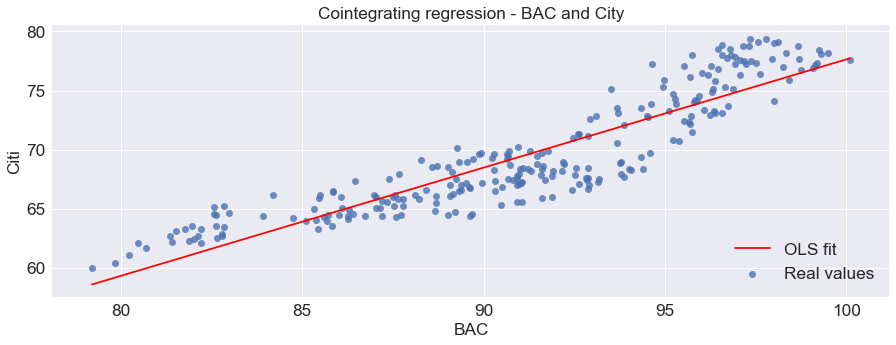

In [13]:
# ===== PLOT OLS FIT  =====

# generate equally spaced X values between true X range
x_axis = np.linspace(Y2_t.min(), Y2_t.max(), 100)

# Plot the estimated dependent variable
Y1_t_hat = a_hat + beta2_hat * x_axis

# Plot own fit on top of seaborn scatter + fit
plt.title('Cointegrating regression - BAC and City')
ax = sns.regplot(x=Y2_t_Series, y=Y1_t_Series, fit_reg=False)  # true values
ax.plot(x_axis, Y1_t_hat, 'r')
plt.legend(['OLS fit', 'Real values'], loc='lower right')

mu={-0.000000}, sigma={2.090466}


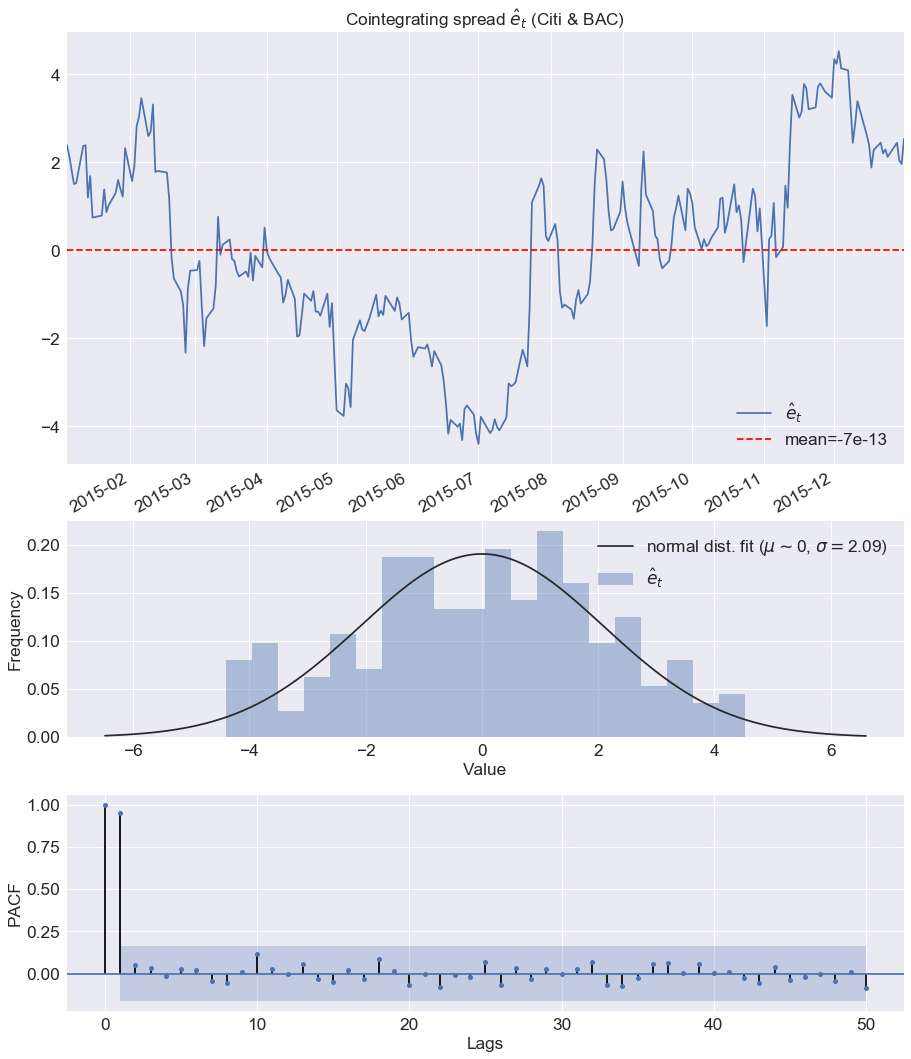

In [14]:
# Spread Plots

from matplotlib import gridspec
plt.figure(1, figsize=(15, 20))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.5, 0.5])

#Spread Time Series

et_hat_series =  pd.Series(et_hat, name = 'Spread')


plt.subplot(gs[0])
plt.title('Cointegrating spread $\hat{e}_t$ (Citi & BAC)')
et_hat_series.plot()
plt.axhline(et_hat_series.mean(), color='red', linestyle='--') # Add the mean
plt.legend(['$\hat{e}_t$', 'mean={0:0.2g}'.format(et_hat_series.mean())], loc='lower right')
plt.xlabel('')

# === SPREAD HISTOGRAM ===

plt.subplot(gs[1])

from scipy import stats

ax = sns.distplot(et_hat_series, bins=20, kde=False, fit=stats.norm);
plt.title('Distribution of Cointegrating Spread for Citi and BAC')

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(et_hat_series)
print ("mu={%f}, sigma={%f}" % (mu, sigma))

# Legend and labels 
plt.legend(["normal dist. fit ($\mu \sim${0}, $\sigma=${1:.2f})".format(0, sigma),
            "$\hat{e}_t$"
           ])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('')

# === SPREAD PACF ===

from statsmodels.graphics.tsaplots import plot_pacf

ax = plt.subplot(gs[2])
plot_pacf(et_hat_series, lags=50, alpha=0.01, ax=ax)
plt.title('')
plt.xlabel('Lags')
plt.ylabel('PACF')


# Part 4 - Describes robust estimation.

### Statistical Arbitrage with Cointegration

* Cointegrated prices generated a mean-reverting spread. It is possible to enter systematic trades that generated P&L


* Designed a trade and evaluated profitability.


* Drawdown control and backtesting.


* For systematic tradingm specified:
    * Loading $\beta_c$ give positive $\beta' P_t$
    * Bounds gave entry / exit, and
    * Speed of reversion gives idea on probability over time.

#### Mean reverting spread

* Using a cointegrated relationship amouing Volatility Futures, obtained a mean-reverting spread $\theta$ >> 0


* The bounds are calculated by fitting to the OU process.

#### OU process

Considered the process because it generated mean-reversion

$$
dY_t = -\theta (y_t - \mu_e) dt + \sigma dX_t
$$

$\theta$ is the spread of reversion

$\mu_e$ is the equilibrium level

$\sigma$ is the scatter of diffussion

#### Evaluating mean- reversion

OU SDE solution for $e_{t+\tau}$ has mean-reverting and auto-regressive terms

$$
[e_{t+\tau} = (1-e^{-\theta_T}) \mu_e + e^{-\theta_T} e_t + \epsilon_{t,T}  ]
$$


Estimate a simple regression as follows:

$$
e_t = C + \beta e_{t-1} + \epsilon_{t,T}
$$

$$
e^{-\theta_r} = \beta \implies \theta  = - \frac{ln \beta}{\tau}
$$


$$
(1- e^{-\theta r}) \mu_e = C \implies \mu_e =  \frac{C}{1-\beta}
$$

#### Bonus of reversion

* This scatter of the O.U. process relates to the total variance of co-integrating residual $e_t$ (where $\tau$ is data frequency)

$$
\quad \sigma_{OU} = \sqrt{\frac{2 \theta}{1-e^{-2\theta \tau}} Var[\epsilon_{t, \tau}]}
$$


$\sigma_{OU}$ is diffusion over small time scale (volatility coming from small ups and downs of BM). But we are interested in reversion from 1 to $\mu_e$


To plot trading bounds we use

$$
\sigma_{eq} = \frac{\sigma_{OU}}{\sqrt{2\theta}}
$$


for potential entry/exit signals $\mu_e \pm \sigma_{eq}$


To set up an arbitrage trade, one requires the following items of information:
* Weight $\beta_{coint}'$ to obtain the spread as:
    
$$
        \beta_{1,c}P_{1,t} + \beta_{2,c}P_{2,t} + ... + \beta_{n,c}P_{n,t}
$$

* Speed of mean-reversion in the spread $\theta$ , which can be converted into half life (expected position holding times) as :
$$
        \hat{\tau}\space \alpha\space ln \frac{2}{\theta}
$$


* Entry and exit signals defined by $\sigma_{eq}$ optimization involved 

$e_t$ crosses $\mu_e + \sigma_{eq}$
$$
\mu_e \pm a \sigma_{eq}
$$



In [15]:
from statsmodels.tsa.ar_model import AR
resultGetVectorAR = GetVectorAR(et_hat[None,:], maxlags=1, trend='c')
resultGetAR = AR(et_hat).fit(maxlag=3, trend='c', method='cmle')

# Stability Check
print ('Is AR({%d}) model stable: {%s}' % (resultGetAR.k_ar, str(IsStable(resultGetAR.roots))))
print ('Is VectorAR({%s}) model stable: {%s}' % (resultGetVectorAR['maxlags'], str(IsStable(resultGetVectorAR['roots']))))


Is AR({3}) model stable: {True}
Is VectorAR({1}) model stable: {True}


In [16]:
tau = 1.0 / 252.0
print(resultGetVectorAR['sigma_hat'][0])
C = resultGetVectorAR['beta_hat'][0][0]
B = resultGetVectorAR['beta_hat'][0][1]
theta = - np.log(B) / tau
mu_e = C / (1.0 - B)
sigma_ou = np.sqrt((2 * theta / (1 - np.exp(-2 * theta * tau))) * resultGetVectorAR['sigma_hat'][0])
sigma_e = sigma_ou / np.sqrt(2 * theta)
halflife = np.log(2) / theta

print (' AR({%f}): C={%f}, B={%f}, tau={%f}, theta={%f}, mu_e={%f}, sigma_ou={%f}, sigma_e={%f}, halflife={%f}' 
% (resultGetVectorAR['maxlags'], C, B, tau, theta, mu_e, sigma_ou, sigma_e, halflife))


# AR(3)
sm_C = resultGetAR.params[0]
sm_B = resultGetAR.params[1]
sm_theta = - np.log(sm_B) / tau
sm_mu_e = sm_C / (1. - sm_B)
sm_sigma_ou = np.sqrt((2 * sm_theta / (1 - np.exp(-2 * sm_theta * tau))) * resultGetAR.sigma2)
sm_sigma_e = sm_sigma_ou / np.sqrt(2 * abs(sm_theta) )
sm_halflife = np.log(2) / sm_theta
print('SM AR({%f}): sm_C={%f}, sm_B={%f}, tau={%f}, sm_theta={%f}, sm_mu_e={%f}, sm_sigma_ou={%f}, sm_sigma_e={%f}, sm_halflife={%f}' % (resultGetAR.k_ar, sm_C, sm_B, tau, sm_theta, sm_mu_e, sm_sigma_ou, sm_sigma_e, sm_halflife))


[ 0.37928271]
 AR({1.000000}): C={0.000119}, B={0.955869}, tau={0.003968}, theta={11.373929}, mu_e={0.002692}, sigma_ou={9.997903}, sigma_e={2.096229}, halflife={0.060942}
SM AR({3.000000}): sm_C={0.001612}, sm_B={0.917407}, tau={0.003968}, sm_theta={21.723357}, sm_mu_e={0.019522}, sm_sigma_ou={10.222880}, sm_sigma_e={1.550939}, sm_halflife={0.031908}


In [17]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

Y_e = et_hat_series.diff()[1:]  
X_e = et_hat_series.shift(1)[1:]  
X_e = add_constant(X_e)
ols = OLS(Y_e, X_e).fit()
X_e = X_e.iloc[:, 1]  

ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.018   
Dependent Variable: Spread           AIC:                471.1009
Date:               2017-07-23 01:33 BIC:                478.1438
No. Observations:   250              Log-Likelihood:     -233.55 
Df Model:           1                F-statistic:        5.555   
Df Residuals:       248              Prob (F-statistic): 0.0192  
R-squared:          0.022            Scale:              0.38234 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      0.0001     0.0391    0.0030   0.9976   -0.0769    0.0771
Spread    -0.0441     0.0187   -2.3568   0.0192   -0.0810   -0.0073
-----------------------------------------------------------------
Omnibus:              16.223       Durbin-Watson:          2.068 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       38.470
Skew:                 0.231        Prob(JB):               0.000 
Kurtosis:             4.865        Condition No.:          2     
=================================================================

"""

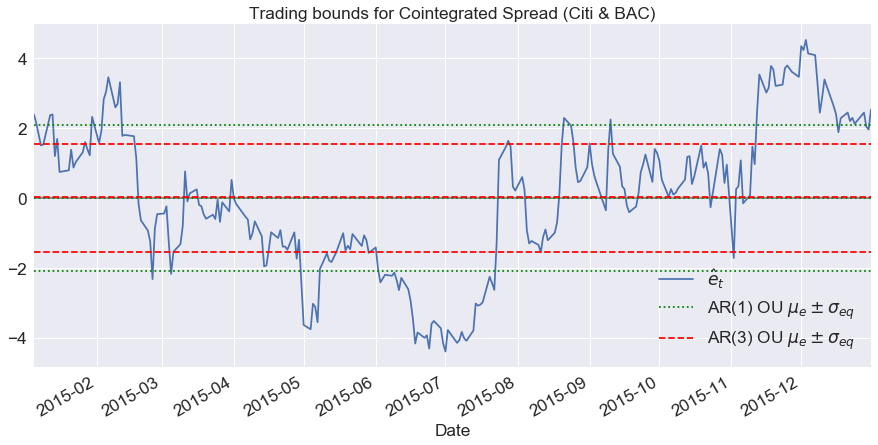

In [18]:
et_hat_series.plot(label='$\hat{e}_t$', figsize=(15, 7))

plt.title('Trading bounds for Cointegrated Spread (Citi & BAC)')
plt.axhline(0, color='grey', linestyle='-')  # axis line

plt.axhline(mu_e, color='green', linestyle=':', label='AR(1) OU $\mu_e \pm \sigma_{eq}$')
plt.axhline(sm_mu_e, color='red', linestyle='--', label='AR(3) OU $\mu_e \pm \sigma_{eq}$')

plt.axhline(sigma_e, color='green', linestyle=':')
plt.axhline(-sigma_e, color='green', linestyle=':')
plt.axhline(sm_sigma_e, color='red', linestyle='--')
plt.axhline(-sm_sigma_e, color='red', linestyle='--')

plt.legend(loc='lower right')

# Part 5 - Trading strategy based on cointegration spread.

* Cointegration is a "different" form of correlation (very loosely speaking). The spread between two cointegrated timeseries will vary around a mean. The expected value of the spread over time must converge to the mean for pairs trading work work. Another way to think about this is that cointegrated timeseries might not necessarily follow a similar path to a same destination, but they both end up at this destination.

#### Simple Strategy:

Go "Long" the spread whenever the z-score is below -1.0

Go "Short" the spread when the z-score is above 1.0

Exit positions when the z-score approaches zero

#### Alpha and Beta

Beta is the strategy's market exposure, for which you should not pay much as it is easy to gain by buying an ETF or Index Futures contransts.

Alpha is the excess return after substracting return due to market movements.

$$
R_t^s = \alpha + \beta R_t^M + \epsilon_t
$$

$$
E[R_t^s - \beta R_t^M] = \alpha
$$


$R_t^M = R_t - r_t $ is the time series of returns representing the market factor.

#### Risk Reward ratio

Information Ration (IR) focuses on risk adjusted abnormal return, the risk adjusted alpha!

$$
\frac{\alpha}{\sigma(\epsilon)}
$$


However, this does include transaction costs.


Sharpe ration measures return per unit of risk.

$$
\frac{E[R_t - r_t]}{\sigma(R_t - r_t)}
$$

#### Factors
Evaluationg performance against factors is the central part of the backtesting.

The separation of alpha and beta in regression w.r.t. one market factor:

$$
R_t^s = \alpha + \beta R_T^M + \epsilon_t
$$

We see that a factor is a time series of changes similar to the series of asset returns.

### Named factors

* Long-short High Minus Low (HML) or value factor : buy top 30% of the companies with the high book to market value and sell the bottom 30% (expensive stocks)


* Small Minus Big (SMB) factor shorts large cap stocks so $\beta^{SMB}$ measures the tilt towards small stocks.


* Up Minus Down (UMD) or momentum factor would leverage on stocks that are going up. The recent month's returns are excluded from the calculations to avoid a spurious signal.



#### Factor Backtesting

To check against the factors we can setup a regressions:

$$
R_t^s = \alpha + \beta^M R_t^M + \beta^{HML} + \epsilon_t
$$


where $R_t^{HML}$ is the return series from the long-short HML factor.

* We can add factors to this regression.

* We can have rolling estimates of these betas for each day/week.




#### Drawdown control

The strategy must be able to survive without running into a close-out

It makes sense to pre-define Maximum Acceptable Drawdown (MADD) and trace.

$$
VaR_t \le MADD - DD_t
$$

where $VaR_t$ is today's VaR and $DD_t$ is current drawdown.

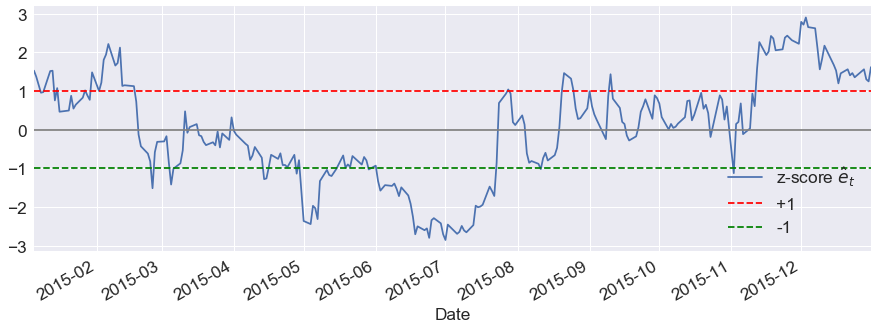

In [19]:
et_hat_n = GetZScore(et_hat, mean=sm_mu_e, sigma=sm_sigma_e)
et_hat_n_series = pd.Series(et_hat_n, name='et_hat_n')
et_hat_n_series.plot()
plt.axhline(1, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.legend(['z-score $\hat{e}_t$', '+1', '-1'], loc='lower right')
plt.axhline(0, color='grey')

In [20]:
pnl_is = Get_Pnl_DF(et_hat_series, mean=sm_mu_e, sigma=sm_sigma_e)
pnl_is.tail()

,e_t_hat,e_t_hat_norm,pos,chg,pnl,pnl_cum
Date,,,,,,
2015-12-24,2.122922,1.356210,-1.0,0.320505,-0.320505,19.395899
2015-12-28,2.443427,1.562863,-1.0,-0.401920,0.401920,19.797819
2015-12-29,2.041507,1.303717,-1.0,-0.082239,0.082239,19.880058
2015-12-30,1.959268,1.250691,-1.0,0.572011,-0.572011,19.308047
2015-12-31,2.531279,1.619507,-1.0,NaN,NaN,NaN


In [21]:
pnl_is.loc[pnl_is['pnl'].isnull(), 'pnl']

Date
2015-12-31   NaN
Name: pnl, dtype: float64

In [22]:
%run getpyfolio.py

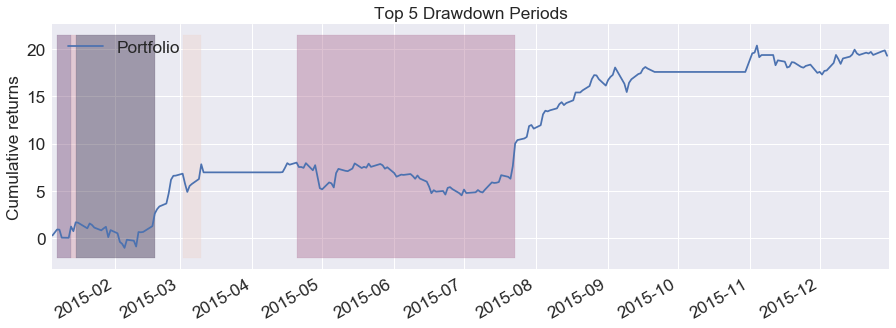

In [23]:
plot_drawdown_periods(pnl_is['pnl'], top=5)

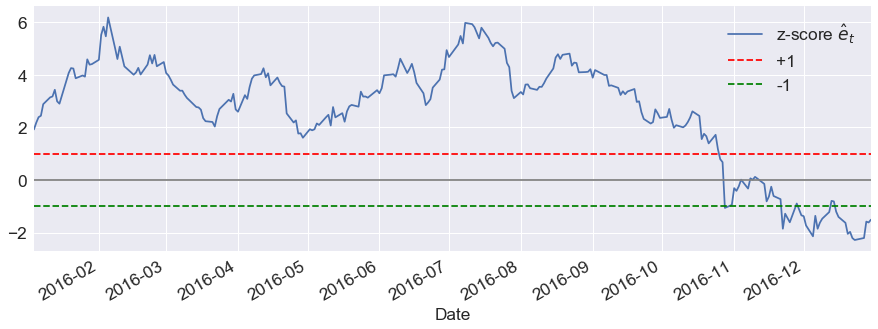

In [24]:
# ======== OUT-OF-SAMPLE TESTING ========

# Construct the out-of-sample spread
et_hat_os = Y1_t_os - np.dot(beta2_hat, Y2_t_os) - a_hat


# Normalise to OU bounds
et_hat_os_norm = GetZScore(et_hat_os, mean=sm_mu_e, sigma=sm_sigma_e)

et_hat_os_norm = pd.Series(et_hat_os_norm, name = 'et_hat_os_norm')
et_hat_os_norm.plot()
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['z-score $\hat{e}_t$', '+1', '-1'], loc='upper right')
plt.axhline(0, color='grey')

In [25]:
pnl_os = Get_Pnl_DF(et_hat_os, mean=sm_mu_e, sigma=sm_sigma_e)
pnl_os.tail()

,e_t_hat,e_t_hat_norm,pos,chg,pnl,pnl_cum
Date,,,,,,
2016-12-23,-3.520846,-2.282725,1.0,0.117466,0.117466,5.754252
2016-12-27,-3.403380,-2.206986,1.0,0.968162,0.968162,6.722413
2016-12-28,-2.435218,-1.582744,1.0,-0.051899,-0.051899,6.670514
2016-12-29,-2.487118,-1.616207,1.0,0.163764,0.163764,6.834278
2016-12-30,-2.323354,-1.510617,1.0,NaN,NaN,NaN


In [26]:
pnl_is[:-1]['pnl_cum'][-1]  # last non-nan row of in-sample pnl

19.308047138547984

In [27]:
%run getpyfolio.py

In [28]:
pnl_is.index[-1]

Timestamp('2015-12-31 00:00:00')

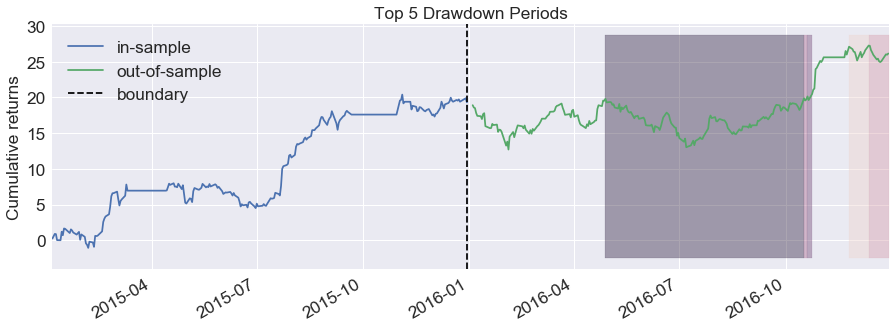

In [29]:
df_temp = pnl_is[:-1]['pnl_cum']
k = df_temp[-1]
df_temp.plot()
plot_drawdown_periods(pnl_os['pnl'], k=k, top=5)
plt.axvline(df_temp.index[-1], color='black', linestyle='--')
plt.legend(['in-sample', 'out-of-sample', 'boundary'], loc='upper left')